In [48]:
import pandas as pd


In [49]:
df=pd.read_csv("/Users/ranjit/Downloads/diamonds.csv")

In [50]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* Objective

To predict the price of a diamond based on its physical and categorical features like:

Carat (weight)

Cut

Color

Clarity

Depth

Table

Dimensions (x, y, z)

🧠 Business Understanding

Diamonds are priced based on the 4 C’s:

Cut: quality of the diamond’s shape (Ideal, Premium, Good, etc.)

Color: grade of color (from D = best to J = worst)

Clarity: transparency (IF, VS1, SI2, etc.)

Carat: weight of the diamond (numeric)

These, along with measurements like depth, table, x, y, z, determine the price.

We’ll train a KNN Regression model to predict the price of a diamond from these features.

In [51]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [52]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [53]:
df.shape


(53940, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [55]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [56]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [57]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [58]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [59]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [60]:
df.rename(columns={
    'x': 'Lenght_in_MM',
    'y': 'Width_in_MM',
    'z': 'depth_in_MM'
}, inplace=True)


In [61]:
df

,carat,cut,color,clarity,depth,table,price,Lenght_in_MM,Width_in_MM,depth_in_MM
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [62]:
# Delete all rows containing 0 in any column
df = df[(df != 0).all(axis=1)]

# Verify the result
print(f"Remaining rows after removing 0s: {df.shape[0]}")
df.head()


Remaining rows after removing 0s: 53920


,carat,cut,color,clarity,depth,table,price,Lenght_in_MM,Width_in_MM,depth_in_MM
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data preparation:

- Train test split.
- Encoding for categorical column:
   - Ordinal encoding: LabelEncoding and OrdinalEncoding
   - Nominal encoding: OneHotEncoding and get_dummies
 
- Scaling for Numerical columns:
  - Normalization
  - Standardization (Z- transformation)
 

# We are going to follow below steps:

a. Identify the traget variable and splitting the data into train and test.
b. Seperating the categorical features and numerical features.
c. Rescaling the numercial features. (standardization)
d. Applying onehot and label encoding.
e. concatenating the encoded categorical and scaled numerical features.

In [63]:
x=df[["carat","cut","color","clarity","depth","table","Lenght_in_MM","Width_in_MM","depth_in_MM"]]
y=df[["price"]]

In [64]:
x

,carat,cut,color,clarity,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [65]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [66]:
# splitting the data into train and test.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20)


In [67]:
x_test.head()

,carat,cut,color,clarity,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
51907,0.70,Good,E,SI2,63.7,55.0,5.63,5.58,3.57
38439,0.35,Very Good,F,IF,62.0,54.0,4.55,4.58,2.83
17594,1.00,Good,E,VVS1,64.1,62.0,6.29,6.26,4.02
30176,0.29,Ideal,G,IF,61.3,56.0,4.26,4.29,2.62
44681,0.50,Premium,D,SI1,62.3,58.0,5.08,5.07,3.16


In [68]:

# categorical features

x_train_cat=x_train.select_dtypes(include=["object"])
x_train_cat


,cut,color,clarity
29880,Very Good,D,VS2
40542,Premium,E,IF
40178,Premium,E,VVS1
30355,Very Good,D,SI1
45682,Ideal,F,VS1
...,...,...,...
23461,Premium,H,SI1
23784,Very Good,D,SI2
37152,Ideal,D,VS2
27111,Premium,H,SI1


In [69]:

# categorical features

x_train_num=x_train.select_dtypes(include=["int","float"])
x_train_num

,carat,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
29880,0.30,62.8,59.0,4.26,4.28,2.68
40542,0.35,59.0,61.0,4.64,4.62,2.73
40178,0.38,60.6,59.0,4.65,4.62,2.81
30355,0.33,63.1,55.0,4.40,4.38,2.77
45682,0.50,61.6,57.0,5.07,5.09,3.13
...,...,...,...,...,...,...
23461,1.62,62.2,58.0,7.50,7.46,4.65
23784,1.71,63.5,56.0,7.58,7.51,4.79
37152,0.32,62.2,56.0,4.39,4.36,2.72
27111,2.02,62.1,61.0,8.06,7.99,4.98


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train_num_rescaled=pd.DataFrame(scaler.fit_transform(x_train_num),columns=x_train_num.columns, index=x_train_num.index)
x_train_num_rescaled.head()

,carat,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
29880,-1.048904,0.738706,0.697742,-1.314132,-1.298439,-1.215525
40542,-0.943263,-1.927502,1.596306,-0.974178,-0.994338,-1.144728
40178,-0.879878,-0.804888,0.697742,-0.965232,-0.994338,-1.031454
30355,-0.985519,0.949196,-1.099387,-1.188886,-1.208997,-1.088091
45682,-0.626339,-0.103254,-0.200822,-0.589493,-0.573962,-0.578357


In [71]:
x_train_cat

,cut,color,clarity
29880,Very Good,D,VS2
40542,Premium,E,IF
40178,Premium,E,VVS1
30355,Very Good,D,SI1
45682,Ideal,F,VS1
...,...,...,...
23461,Premium,H,SI1
23784,Very Good,D,SI2
37152,Ideal,D,VS2
27111,Premium,H,SI1


In [72]:
cut_encoder={"Fair":1,"Good":2,"Very Good":3,"Ideal":4,"Premium":5}
x_train_cat_le=x_train_cat["cut"].apply(lambda x:cut_encoder[x])
x_train_cat_le.isnull().sum()

np.int64(0)

In [73]:
#one hot encoding for nominal type of data.
x_train_cat_onehot=x_train_cat[["color","clarity"]]
x_train_cat_onehot.head()

,color,clarity
29880,D,VS2
40542,E,IF
40178,E,VVS1
30355,D,SI1
45682,F,VS1


In [74]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse_output=False)

encoded=encoder.fit_transform(x_train_cat_onehot[["color","clarity"]])
encoded.shape

(37744, 13)

In [75]:
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["color","clarity"]),index=x_train_cat_onehot.index)
encoded

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
29880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# concatenating label encoding feature with one hot encoded

x_train_transfomed=pd.concat([encoded,x_train_cat_le,x_train_num_rescaled],axis=1)

In [77]:
x_train_transfomed.head()

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,carat,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
29880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,-1.048904,0.738706,0.697742,-1.314132,-1.298439,-1.215525
40542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-0.943263,-1.927502,1.596306,-0.974178,-0.994338,-1.144728
40178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,-0.879878,-0.804888,0.697742,-0.965232,-0.994338,-1.031454
30355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,-0.985519,0.949196,-1.099387,-1.188886,-1.208997,-1.088091
45682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,-0.626339,-0.103254,-0.200822,-0.589493,-0.573962,-0.578357


In [78]:
x_test

,carat,cut,color,clarity,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
51907,0.70,Good,E,SI2,63.7,55.0,5.63,5.58,3.57
38439,0.35,Very Good,F,IF,62.0,54.0,4.55,4.58,2.83
17594,1.00,Good,E,VVS1,64.1,62.0,6.29,6.26,4.02
30176,0.29,Ideal,G,IF,61.3,56.0,4.26,4.29,2.62
44681,0.50,Premium,D,SI1,62.3,58.0,5.08,5.07,3.16
...,...,...,...,...,...,...,...,...,...
11619,1.01,Ideal,G,SI1,60.6,59.0,6.45,6.49,3.92
37428,0.34,Premium,D,VVS2,60.1,58.0,4.53,4.55,2.73
18688,1.50,Premium,F,SI2,58.5,60.0,7.52,7.48,4.39
42894,0.51,Premium,H,VS2,58.5,61.0,5.26,5.23,3.07


In [79]:
# numerical features
x_test_num=x_test.select_dtypes(include=["int64","float64"])

x_test_num_rescaled=pd.DataFrame(scaler.transform(x_test_num),columns=x_test_num.columns, index=x_test_num.index)
x_test_num_rescaled.head()

,carat,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
51907,-0.203774,1.370177,-1.099387,-0.088508,-0.135699,0.044651
38439,-0.943263,0.177399,-1.548669,-1.054694,-1.030114,-1.003136
17594,0.430073,1.650830,2.045589,0.501938,0.472504,0.681818
30176,-1.070032,-0.313744,-0.650105,-1.314132,-1.289495,-1.300480
44681,-0.626339,0.387889,0.248460,-0.580547,-0.591851,-0.535880


In [80]:
x_test_cat=x_test.select_dtypes(include=["object"])

# label encoding

cut_encoder={"Fair":1,"Good":2,"Very Good":3,"Ideal":4,"Premium":5}
x_test_cat_le=x_test_cat["cut"].apply(lambda x:cut_encoder[x])
x_test_cat_le.isnull().sum()

np.int64(0)

In [81]:
# one hot 
#one hot encoding for nominal type of data.
x_test_cat_onehot=x_test_cat[["color","clarity"]]
x_test_cat_onehot.head()
encoded=encoder.transform(x_test_cat[["color","clarity"]])

encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["color","clarity"]),index=x_test_cat_onehot.index)
encoded

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
51907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38439,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30176,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42894,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# concatenating label encoding feature with one hot encoded and scALed one

x_test_transfomed=pd.concat([encoded,x_test_cat_le,x_test_num_rescaled],axis=1)

In [83]:
x_test_transfomed.head()

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,carat,depth,table,Lenght_in_MM,Width_in_MM,depth_in_MM
51907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,-0.203774,1.370177,-1.099387,-0.088508,-0.135699,0.044651
38439,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,-0.943263,0.177399,-1.548669,-1.054694,-1.030114,-1.003136
17594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.430073,1.650830,2.045589,0.501938,0.472504,0.681818
30176,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-1.070032,-0.313744,-0.650105,-1.314132,-1.289495,-1.300480
44681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,-0.626339,0.387889,0.248460,-0.580547,-0.591851,-0.535880


KNN Regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train_transfomed,y_train)   # teaching the model


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [85]:
# validating the model
#import numpy as np
y_test_pred=regressor.predict(x_test_transfomed)
y_test_pred,y_test

(array([[2170.8],
        [ 904.2],
        [5635.6],
        ...,
        [8211.8],
        [1127.8],
        [ 941. ]]),
        price
 51907   2435
 38439   1027
 17594   7084
 30176    721
 44681   1610
 ...      ...
 11619   5049
 37428    984
 18688   7644
 42894   1359
 40299   1125
 
 [16176 rows x 1 columns])

<Axes: ylabel='Count'>

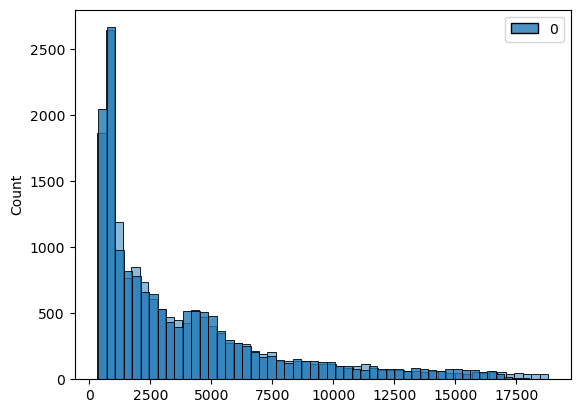

In [86]:
import seaborn as sns
sns.histplot(y_test,color="pink",alpha=0.5)
sns.histplot(y_test_pred,color="blue",alpha=0.8)

In [95]:
#judging the performance of regression model 
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("mean_square_error",mean_squared_error(y_test,y_test_pred))

mean_square_error 656191.8666073194


In [96]:
print("mean_absolute-error",mean_absolute_error(y_test,y_test_pred))

mean_absolute-error 419.98845202769536


In [98]:
import numpy as np
print("root_mean_absolute-error",np.sqrt(mean_squared_error(y_test,y_test_pred)))

root_mean_absolute-error 810.0567057973901


# conclusion:

- while evaluating the KNN regressor, the concept of "percentage accuracy" is not directly applicable in the same way as it is for
  classification type of models.

- For regression tasks the goal is to achieve or to predict the continuous numerical value, not any category.
- Therefore metrics like accuracy which measure the proportion of correct predictions are not suitable.
- instead we judge the performance with the error metrics.

- MAE (mean absolute error): This measures the average absolute difference between predicted and actual value.
- MSE (mean sqaured error): the avreage of the sqaured distance between predicted and actual values. It penalizes larger error more heavily.
- RMSE (Root mean squared error): This is sqaure root of MSE and often preferred because it is in the same units as the target variable.

In [99]:
df['price'].describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64


## we are considering the root mean squared error:

- RMSE represents average prediction error- typically the distance between your model's prediction price and the actual price.
- RMSE= 810.05 my model's price prediction are off by 810 units. (eg. 810 rs, $810 ,etc)

- how to to tell if it is good performance or bad
810/3930=0.206 ~ 20.6% error

- RMSE = 810 → your model’s predictions are off by 810 price units on average.
- Whether that’s acceptable depends on how large the prices typically are.
- To make this meaningful, compare RMSE to:
- The mean or median price, or
- The standard deviation of prices.
- From the error percentage our accuracy percentage of model is 80.4%